In [1]:
# Import dependencies
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import CSV of Disneyland reviews
reviews_file = "Resources/DisneyReviews.csv"
reviewsdf = pd.read_csv(reviews_file, encoding='latin-1')
reviewsdf.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [3]:
# drop Disneyland_HongKong and Disneyland_Paris 
reviewsdf = reviewsdf.loc[(reviewsdf['Branch']=='Disneyland_California')&(reviewsdf['Year_Month']!='missing')]
reviewsdf

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California
9622,670565072,4,2019-5,Australia,All and all a great day was had. The crowds ar...,Disneyland_California
9623,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California
9624,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California
...,...,...,...,...,...,...
28499,92494269,1,2010-12,Canada,"Myself, along with my two chidren ages 8 and 1...",Disneyland_California
28500,92313324,4,2010-12,United States,We love Disneyland so much that we go there of...,Disneyland_California
28501,91799423,5,2010-10,Australia,As this was part of our international conferen...,Disneyland_California
28502,91657810,4,2010-12,Australia,we spent one day at disneyland withmy sister ...,Disneyland_California


In [4]:
# Format Year_Month to datetime
reviewsdf['YYYY-MM'] = pd.to_datetime(reviewsdf['Year_Month'], format='%Y-%m', errors='coerce').dropna()
reviewsdf['YYYY-MM'] = reviewsdf['YYYY-MM'].dt.strftime('%Y-%m')
reviewsdf.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,YYYY-MM
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California,2019-04
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California,2019-04
9622,670565072,4,2019-5,Australia,All and all a great day was had. The crowds ar...,Disneyland_California,2019-05
9623,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California,2019-04
9624,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California,2019-04


In [5]:
# Filter out reviews before September 2014 and after April 2019
reviewsdf = reviewsdf[(reviewsdf['YYYY-MM'] >= "2014-09-01") & (reviewsdf['YYYY-MM'] <= "2019-04-30")]
reviewsdf

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,YYYY-MM
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California,2019-04
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California,2019-04
9623,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California,2019-04
9624,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California,2019-04
9625,670382191,5,2019-4,Lebanon,Oh my god you can really forget your self and ...,Disneyland_California,2019-04
...,...,...,...,...,...,...,...
20806,233097639,5,2014-10,United States,Of course the cast members were friendly and t...,Disneyland_California,2014-10
20810,232980678,3,2014-10,United States,"Saw Disneyland and princesses and rides, and A...",Disneyland_California,2014-10
20823,232782547,4,2014-10,United States,"Well, first I'm in my early 60's so that chang...",Disneyland_California,2014-10
20836,232535051,5,2014-10,Australia,we visited both parks over two days. We have p...,Disneyland_California,2014-10


In [6]:
# Group by month/year and take an average of ratings
monthgroups = reviewsdf.groupby('YYYY-MM')
monthratings = monthgroups['Rating'].mean()
monthratings.head()

YYYY-MM
2014-10    4.459649
2014-11    4.468750
2014-12    4.424000
2015-01    4.453947
2015-02    4.431953
Name: Rating, dtype: float64

In [7]:
# Import CSV of scraped Disneyland crowd and weather data
scrape_file = "Resources/scraped_data.csv"
scrapedf = pd.read_csv(scrape_file)
scrapedf.head()

,date,max_temp,min_temp,crowd_level
0,2014-09-01,82,68,6
1,2014-09-02,83,69,2
2,2014-09-03,82,69,1
3,2014-09-04,81,68,2
4,2014-09-05,85,66,2


In [8]:
scrapedf['Year_Month'] = pd.to_datetime(scrapedf['date'])
scrapedf.head()

,date,max_temp,min_temp,crowd_level,Year_Month
0,2014-09-01,82,68,6,2014-09-01
1,2014-09-02,83,69,2,2014-09-02
2,2014-09-03,82,69,1,2014-09-03
3,2014-09-04,81,68,2,2014-09-04
4,2014-09-05,85,66,2,2014-09-05


In [9]:
scrapedf['Year_Month'] = scrapedf['Year_Month'].dt.strftime('%Y-%m')
scrapedf.head()

,date,max_temp,min_temp,crowd_level,Year_Month
0,2014-09-01,82,68,6,2014-09
1,2014-09-02,83,69,2,2014-09
2,2014-09-03,82,69,1,2014-09
3,2014-09-04,81,68,2,2014-09
4,2014-09-05,85,66,2,2014-09


In [10]:
# Drop 'unknown' crowd level data
scrapedf = scrapedf.loc[(scrapedf['crowd_level']!='unknown')]
# Make crowd_level an integer
scrapedf['crowd_level'] = scrapedf['crowd_level'].astype(str).astype(int)

In [11]:
monthScraped = scrapedf.groupby('Year_Month')
# monthScraped['crowd_level'] = monthScraped['crowd_level'].astype(str).astype(int)
crowdByMonth = monthScraped['crowd_level'].mean()
crowdByMonth.head()

Year_Month
2014-09    3.200000
2014-10    4.709677
2014-11    5.566667
2014-12    6.677419
2015-01    4.838710
Name: crowd_level, dtype: float64

In [12]:
crowdsAndRatings = pd.concat([monthratings, crowdByMonth], axis=1)

In [13]:
crowdsAndRatings.head()

,Rating,crowd_level
2014-10,4.459649,4.709677
2014-11,4.468750,5.566667
2014-12,4.424000,6.677419
2015-01,4.453947,4.838710
2015-02,4.431953,5.500000


In [14]:
crowdsAndRatings = crowdsAndRatings.dropna()
crowdsAndRatings.head()

,Rating,crowd_level
2014-10,4.459649,4.709677
2014-11,4.468750,5.566667
2014-12,4.424000,6.677419
2015-01,4.453947,4.838710
2015-02,4.431953,5.500000


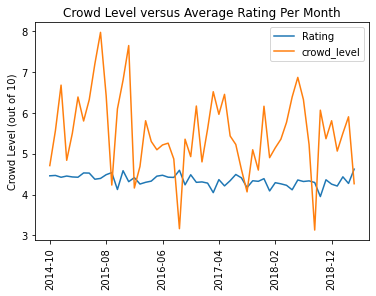

In [15]:
crowdsAndRatings.plot(kind="line")
plt.title('Crowd Level versus Average Rating Per Month')
plt.ylabel('Crowd Level (out of 10)')
plt.xticks(rotation="vertical")
plt.savefig("Images/crowd_level_outof_10.png")
plt.show()

In [16]:
matchedRatings = crowdsAndRatings
matchedRatings['crowd_level'] = matchedRatings['crowd_level'] / 2

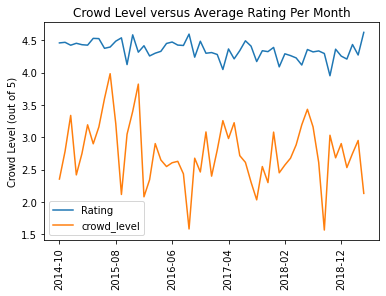

In [17]:
matchedRatings.plot(kind="line")
plt.title('Crowd Level versus Average Rating Per Month')
plt.ylabel('Crowd Level (out of 5)')
plt.xticks(rotation="vertical")
plt.savefig("Images/crowd_level_outof_5.png")
plt.show()

In [18]:
# Check for duplicate Review IDs by value count
reviewsdf.Review_ID.value_counts()

575490047    1
250379621    1
630855008    1
327675231    1
336455006    1
            ..
537723589    1
599608004    1
319432494    1
340818626    1
272540858    1
Name: Review_ID, Length: 10622, dtype: int64

In [19]:
# Split Year_Month into separate columns
timeline = reviewsdf['Year_Month'].str.split('-')
timeline

9620      [2019, 4]
9621      [2019, 4]
9623      [2019, 4]
9624      [2019, 4]
9625      [2019, 4]
            ...    
20806    [2014, 10]
20810    [2014, 10]
20823    [2014, 10]
20836    [2014, 10]
20839    [2014, 10]
Name: Year_Month, Length: 10622, dtype: object

In [20]:
reviewsdf['Year'] = timeline.str[0]

<ipython-input-20-a56dceffcdf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewsdf['Year'] = timeline.str[0]


In [21]:
reviewsdf['Month'] = timeline.str[1]

<ipython-input-21-84c91cb726ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewsdf['Month'] = timeline.str[1]


In [22]:
reviewsdf

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,YYYY-MM,Year,Month
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California,2019-04,2019,4
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California,2019-04,2019,4
9623,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California,2019-04,2019,4
9624,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California,2019-04,2019,4
9625,670382191,5,2019-4,Lebanon,Oh my god you can really forget your self and ...,Disneyland_California,2019-04,2019,4
...,...,...,...,...,...,...,...,...,...
20806,233097639,5,2014-10,United States,Of course the cast members were friendly and t...,Disneyland_California,2014-10,2014,10
20810,232980678,3,2014-10,United States,"Saw Disneyland and princesses and rides, and A...",Disneyland_California,2014-10,2014,10
20823,232782547,4,2014-10,United States,"Well, first I'm in my early 60's so that chang...",Disneyland_California,2014-10,2014,10
20836,232535051,5,2014-10,Australia,we visited both parks over two days. We have p...,Disneyland_California,2014-10,2014,10


In [23]:
ratingCountByYear = reviewsdf.groupby('Year', as_index=False).agg({'Rating':'count'})
ratingCountByYear

,Year,Rating
0,2014,727
1,2015,3239
2,2016,2800
3,2017,2064
4,2018,1501
5,2019,291


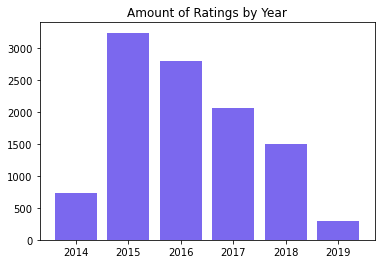

In [24]:
# Data visualization of 'Ratings' vs 'Year'
plt.bar(ratingCountByYear['Year'], ratingCountByYear['Rating'], color = 'mediumslateblue')
plt.title('Amount of Ratings by Year')
plt.show()

Text(0.5, 1.0, 'Reviews by Year')

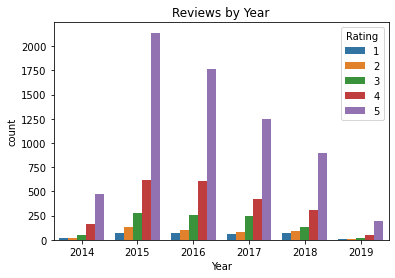

In [25]:
sns.countplot(data = reviewsdf, x = 'Year', hue = 'Rating')
plt.title('Reviews by Year')

In [31]:
reviewCountByMonth = reviewsdf.groupby('Month', as_index=False).agg({'Rating':'count'})
reviewCountByMonth['Month'] = reviewCountByMonth['Month'].astype(int)
reviewCountByMonth.sort_values('Month')

,Month,Rating
0,1,760
4,2,704
5,3,861
6,4,875
7,5,890
8,6,941
9,7,995
10,8,906
11,9,783
1,10,1150


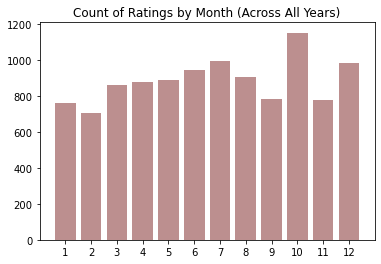

We see that most reviews were posted in October, with December in second place, across all years in our dataset.


In [35]:
# Data Visualization of 'Month' vs total'Ratings'
x = reviewCountByMonth['Month']
# reviewCountByMonth.plot(kind="bar")
plt.bar(reviewCountByMonth['Month'], reviewCountByMonth['Rating'], color = 'rosybrown')
plt.title('Count of Ratings by Month (Across All Years)')
plt.xticks(x)
plt.show()
print('We see that most reviews were posted in October, with December in second place, across all years in our dataset.')

In [28]:
reviewAvgByMonth = reviewsdf.groupby('Month', as_index=False).agg({'Rating':'mean'}).sort_values('Rating')
reviewAvgByMonth

,Month,Rating
1,10,4.255652
5,3,4.277584
0,1,4.322368
4,2,4.328125
3,12,4.346897
7,5,4.378652
6,4,4.388571
8,6,4.393199
9,7,4.409045
10,8,4.430464


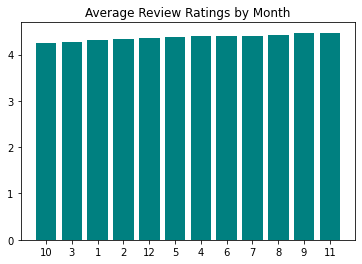

This chart is sorted by review rating, showing that the highest average by month is November.


In [44]:
# Data Visualization of 'Month' vs 'Ratings'
x = reviewAvgByMonth['Month']
y = reviewAvgByMonth['Rating']
plt.bar(x, y, color = 'teal')
plt.title('Average Review Ratings by Month')
plt.show()
print('This chart is sorted by review rating, showing that the highest average by month is November.')

Reviews by Rating (5 is highest)


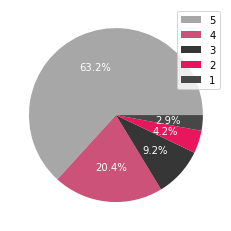

In [48]:
# star distribution on review ratings from high (5) to low (1)
star = reviewsdf["Rating"].value_counts()
colors = ['#A8A7A8', '#CC527A',  '#363636', '#E8175D', '#474747' ]
print('Reviews by Rating (5 is highest)')
plt.pie(star, autopct='%1.1f%%', textprops=dict(color='white'), colors = colors)

plt.legend(labels = star.index)

plt.show()